<a href="https://colab.research.google.com/github/spalominor/AnalisisVentasSupermercado/blob/main/AnalisisVentas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística descriptiva sobre datos de ventas
El crecimiento de los supermercados en las ciudades más pobladas está aumentando y la competencia en el mercado también es alta. El conjunto de datos es reune las ventas históricas de una empresa de supermercados que ha registrado datos en 3 sucursales diferentes durante 3 meses.

In [111]:
# Importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
# Cargar la ruta del archivo CSV con la información
ruta_archivo = (
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vT5YpuR0acTAIJ1kFDR1Hcw"
    "e2LUQY4EidmAZjtH0qIpCod0De0cuqBUW5iAr5AHb_1tvHJvhZ4GtZNq/pub?gid=736432"
    "614&single=true&output=csv"
    )

# Crear un dataframe con la información del CSV
df_ventas = pd.read_csv(ruta_archivo)

# Verficar si el archivo se cargó correctamente
print(df_ventas.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%      Total  \
0       Health and beauty       74.69         7  261.415  5.489.715   
1  Electronic accessories       15.28         5    3.820      80.22   
2      Home and lifestyle       46.33         7  162.155  3.405.255   
3       Health and beauty       58.22         8   23.288    489.048   
4       Sports and travel       86.31         7  302.085  6.343.785   

        Date   Time      Payment    cogs gross margin percentage  \
0   1/5/2019  13:08      Ewallet  522.83           4.761.904.762   
1   3/8/2019  10:29         Cash   76.40           4.761.904.762   
2   3/3/2019  13:23 

# Analizar el dataframe

Obtener información

In [113]:
# Imprimir la información del dataframe
print(df_ventas.info())

# Calcular el total de cada factura
df_ventas['Total'] = df_ventas['Unit price'] * df_ventas['Quantity']

# Imprimir cuantos tipos hay según la categoría
print("\nCantidad de tipos de:")

# Imprimir cuantos tipos de productos hay en el dataframe
print(f"Lineas de productos: {df_ventas['Product line'].nunique()}")

# Imprimir cuantas ciudades hay en el dataframe
print(f"Ciudades: {df_ventas['City'].nunique()}")

# Imprimir cuantos tipos de clientes hay en el dataframe
print(f"Tipos de clientes: {df_ventas['Customer type'].nunique()}")

# Imprimir cuantos tipos de metedos pagos hay en el dataframe
print(f"Metodos de pago: {df_ventas['Payment'].nunique()}\n")

# Obtener información estadística de las variables numéricas del dataframe
print(df_ventas.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   object 
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Analizar datos

Obtener estadísticas descriptivas de los datos


In [114]:
# Calcular la cantidad total de productos vendidos
total_productos = df_ventas['Quantity'].sum()

# Imprimir los resultados
print("Cantidad total de productos vendidos:", total_productos)

# Calcular los ingresos totales
ingresos_totales = df_ventas['Total'].sum()

# Imprimir los resultados
print("Ingresos totales:", ingresos_totales)

# Calcular el promedio de articulos vendidos en cada venta
promedio_ventas_por_producto = df_ventas['Quantity'].mean()

# Imprimir los resultados
print("Promedio de artículos por venta:", promedio_ventas_por_producto)

# Calcular el precio promedio de cada producto
promedio_precio_producto = df_ventas['Unit price'].mean()

# Imprimir resultados
print("Precio promedio de cada producto:", promedio_precio_producto)

Cantidad total de productos vendidos: 5510
Ingresos totales: 307587.38
Promedio de artículos por venta: 5.51
Precio promedio de cada producto: 55.67213


# Análisis con gráficas

Obtener gráficas que describan el comportamiento de las ventas


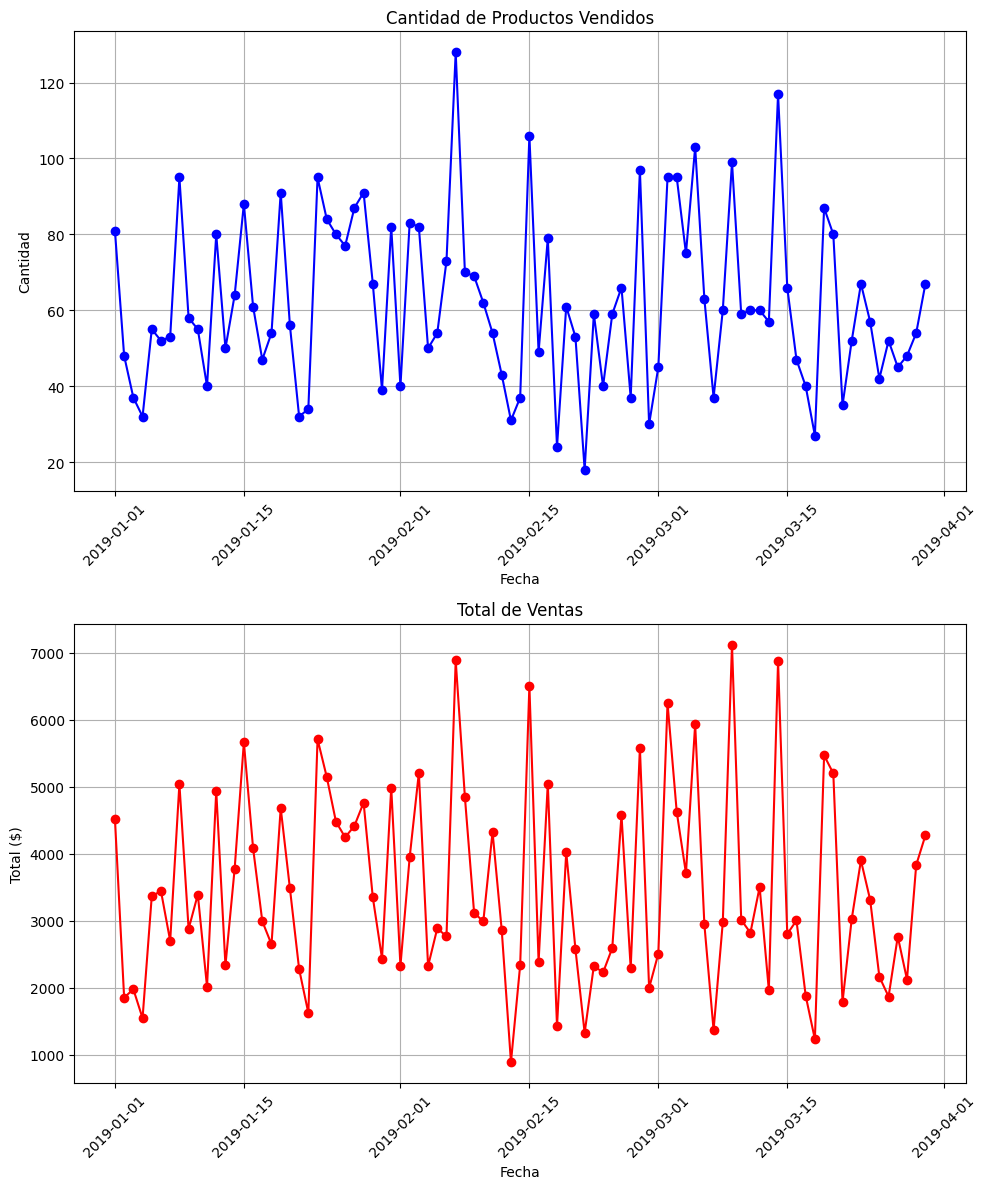

In [115]:
# Convertir la columna de fecha al formato adecuado
df_ventas['Date'] = pd.to_datetime(df_ventas['Date'], format='%m/%d/%Y')

# Agrupar las ventas por fecha y calcular las ventas totales en cada fecha
ventas_por_fecha = df_ventas.groupby('Date')['Quantity'].sum()

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Graficar la cantidad de productos vendidos
ax1.plot(ventas_por_fecha.index,
         df_ventas.groupby('Date')['Quantity'].sum(), marker='o', color='b')
ax1.set_title('Cantidad de Productos Vendidos')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Graficar el total de ventas
ax2.plot(ventas_por_fecha.index,
         df_ventas.groupby('Date')['Total'].sum(), marker='o', color='r')
ax2.set_title('Total de Ventas')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Total ($)')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


# Cantidad de productos por linea de producto versus el tiempo
Gráfiquemos ahora, la cantidad de productos vendidos a lo largo del tiempo, discriminado por la línea de producto ('Product line').

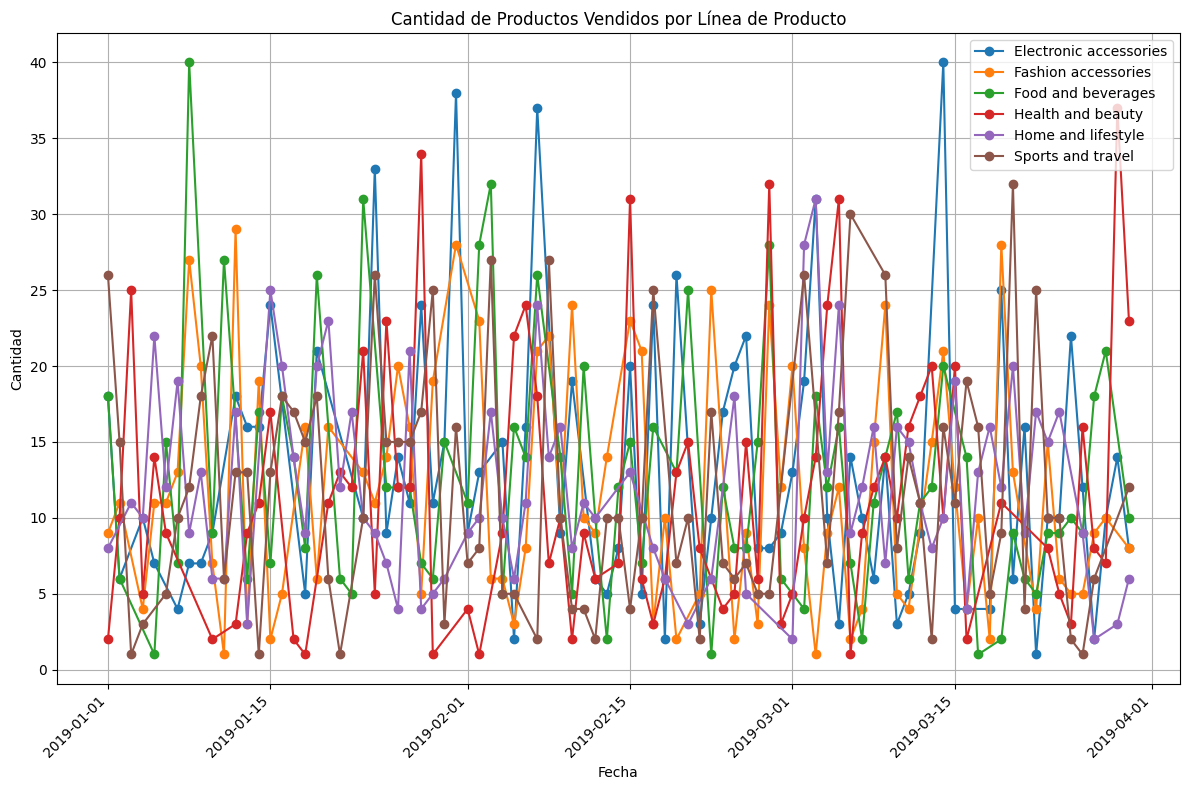

In [116]:
# Crear una figura y ejes para el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada línea de producto y graficar la cantidad de productos vendidos
for product_line, data in df_ventas.groupby('Product line'):
    data.groupby('Date')['Quantity'].sum().plot(label=product_line, marker='o')

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Productos Vendidos por Línea de Producto')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Gráfico de ventas totales por ciudad por línea de producto

Gráfica de barras que describe el total de ventas ($) discriminado por ciudad y línea de producto

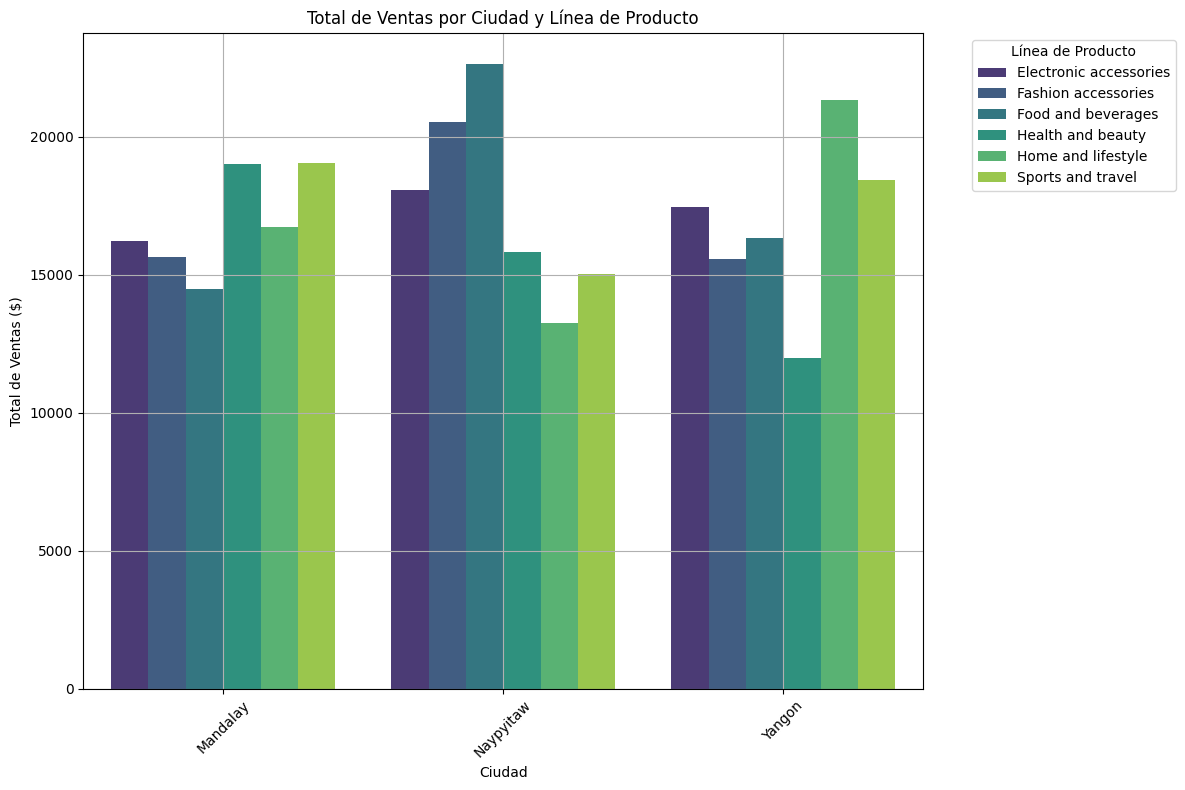

In [117]:
# Calcular el total de ventas por ciudad y línea de producto
ventas_por_ciudad_producto = df_ventas.groupby(
    ['City', 'Product line'])['Total'].sum().reset_index()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(data=ventas_por_ciudad_producto, x='City', y='Total',
            hue='Product line', palette='viridis')
plt.title('Total de Ventas por Ciudad y Línea de Producto')
plt.xlabel('Ciudad')
plt.ylabel('Total de Ventas ($)')
plt.xticks(rotation=45)
plt.legend(title='Línea de Producto',
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Gráfico de distribución de ventas por línea de producto

Gráfica de pastel con la distribución del total de ventas ($) por cada línea de producto ('Product line')

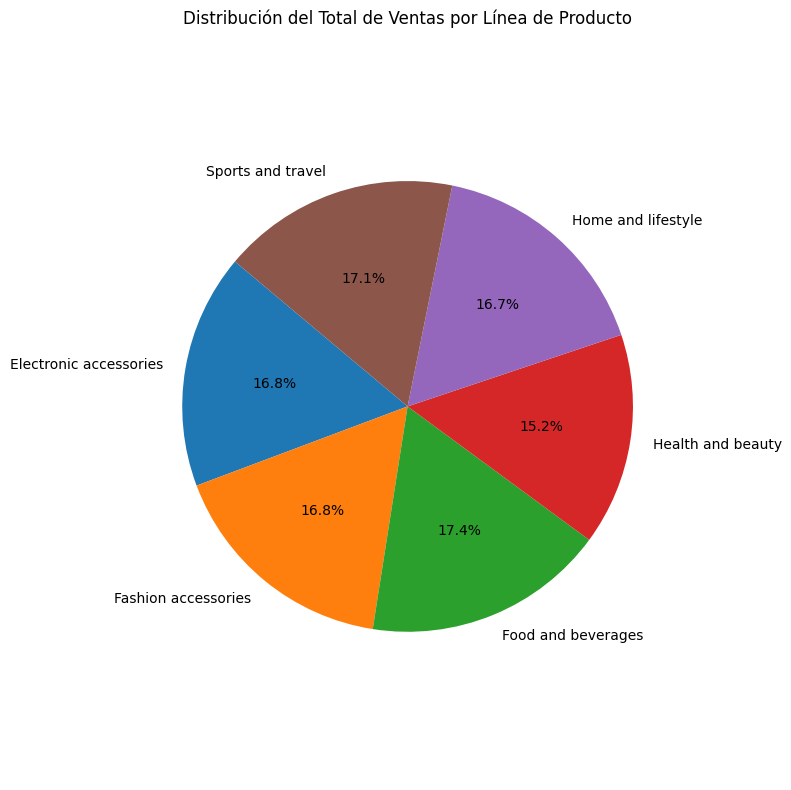

In [118]:
# Calcular el total de ventas por línea de producto
ventas_por_producto = df_ventas.groupby('Product line')['Total'].sum()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_producto, labels=ventas_por_producto.index,
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribución del Total de Ventas por Línea de Producto')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Gráfico apilable de las ventas por ciudad

Gráfica de barras apilable que describe las ventas totales ($) por cada ciudad discriminando los impuestos (5%), los costos (COGS) y los ingresos.

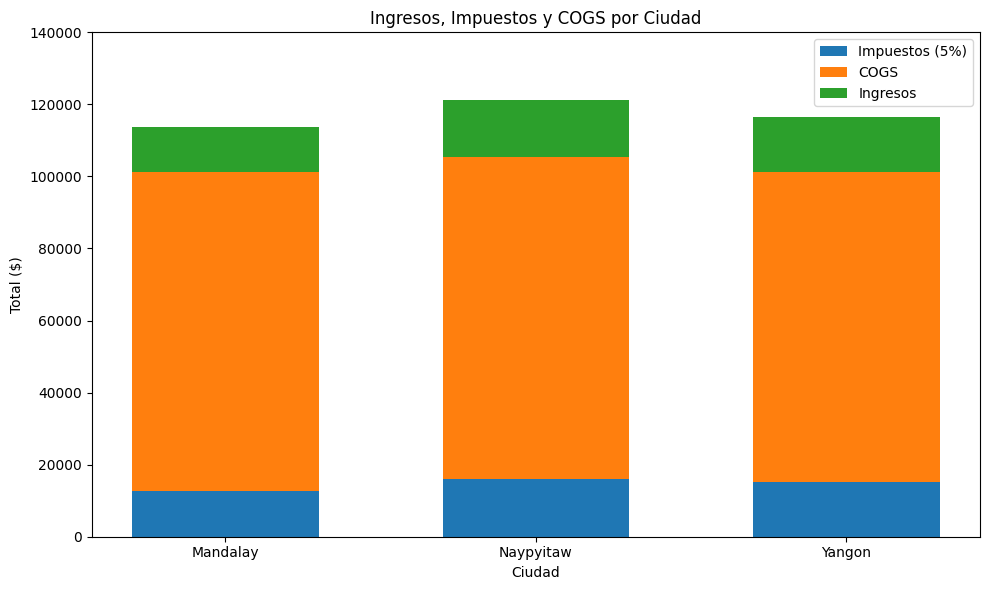

In [119]:
# Calcular los totales de impuestos, cogs y ingresos por ciudad
v_ciudad = df_ventas.groupby('City').agg({'Tax 5%': 'sum',
                                          'cogs': 'sum',
                                          'Total': 'sum'}
                                         ).reset_index()

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))

# Calcular la posición y el ancho de las barras
bar_width = 0.60
index = np.arange(len(v_ciudad['City']))

# Calular el valor máximo de las ventas por cada ciudad
max_value = v_ciudad['Total'].max()

# Gráfico de barras apiladas
ax.bar(index, v_ciudad['Tax 5%'], bar_width, label='Impuestos (5%)')
ax.bar(index, v_ciudad['cogs'], bar_width, label='COGS',
       bottom=v_ciudad['Tax 5%'])
ax.bar(index,
       v_ciudad['Total'] - v_ciudad['Tax 5%'] - v_ciudad['cogs'], bar_width,
       label='Ingresos', bottom=v_ciudad['Tax 5%'] + v_ciudad['cogs'])

# Configurar el título y etiquetas de los ejes
ax.set_title('Ingresos, Impuestos y COGS por Ciudad')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Total ($)')
ax.set_xticks(index)
ax.set_yticks(np.arange(0, max_value*1.50, 20000))
ax.set_xticklabels(v_ciudad['City'])
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Gráfico apilable de las ventas por género

Gráfica de barras apilables con las ventas totales discriminadas por el género del cliente, y describiendo la distribución de estas ventas según la línea de producto

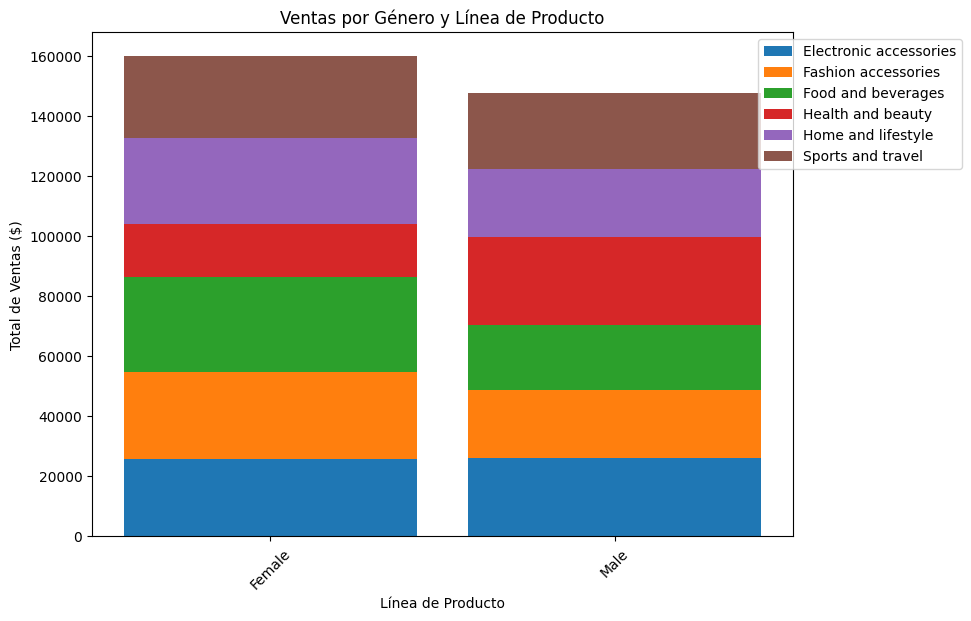

In [120]:
# Calcular los totales de ventas por género y línea de producto
ventas_por_genero_producto = df_ventas.groupby(
    ['Gender', 'Product line'])['Total'].sum().unstack()

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))

# Calcular la posición de las barras
bar_width = 0.85
index = np.arange(len(ventas_por_genero_producto.index))

# Dibujar el gráfico de barras apiladas
for i, gender in enumerate(ventas_por_genero_producto.columns):
    ax.bar(index, ventas_por_genero_producto[gender], bar_width, label=gender,
           bottom=ventas_por_genero_producto.iloc[:, :i].sum(axis=1))

# Configurar el título y etiquetas de los ejes
ax.set_title('Ventas por Género y Línea de Producto')
ax.set_xlabel('Línea de Producto')
ax.set_ylabel('Total de Ventas ($)')
ax.set_xticks(index)
ax.set_xticklabels(ventas_por_genero_producto.index)
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Gráfico apilable con las ventas según el tipo de cliente

Gráfico de barras apilable que discrimina el total de ventas por tipo de cliente, miembro o normal, describiendo la distribución según el método de pago

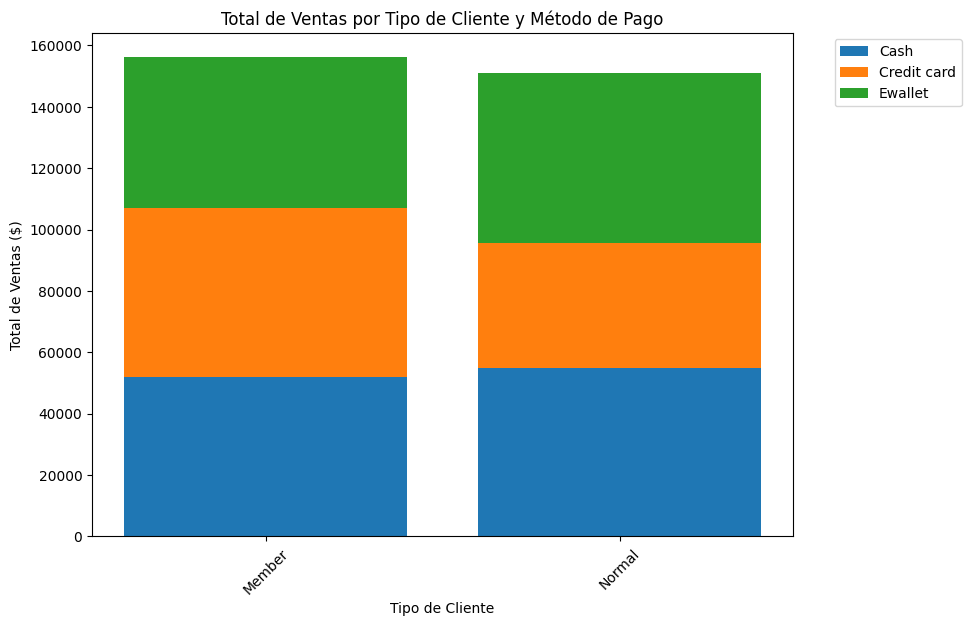

In [121]:
# Calcular los totales de ventas por tipo de cliente y método de pago
ventas_por_tipo_pago = df_ventas.groupby(
    ['Customer type', 'Payment'])['Total'].sum().unstack()

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))

# Calcular la posición de las barras
bar_width = 0.80
index = np.arange(len(ventas_por_tipo_pago.index))

# Gráfico de barras apiladas
for i, customer_type in enumerate(ventas_por_tipo_pago.columns):
    ax.bar(index, ventas_por_tipo_pago[customer_type], bar_width,
           label=customer_type,
           bottom=ventas_por_tipo_pago.iloc[:, :i].sum(axis=1))

# Configurar el título y etiquetas de los ejes
ax.set_title('Total de Ventas por Tipo de Cliente y Método de Pago')
ax.set_xlabel('Tipo de Cliente')
ax.set_ylabel('Total de Ventas ($)')
ax.set_xticks(index)
ax.set_xticklabels(ventas_por_tipo_pago.index)

# Colocar la leyenda fuera de los ejes
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Gráfico con la distribución de ventas por cada día de la semana

Gráfico de pastel que describe la distribución en porcentaje (%) del total de ventas que se hacen cada día de la semana.

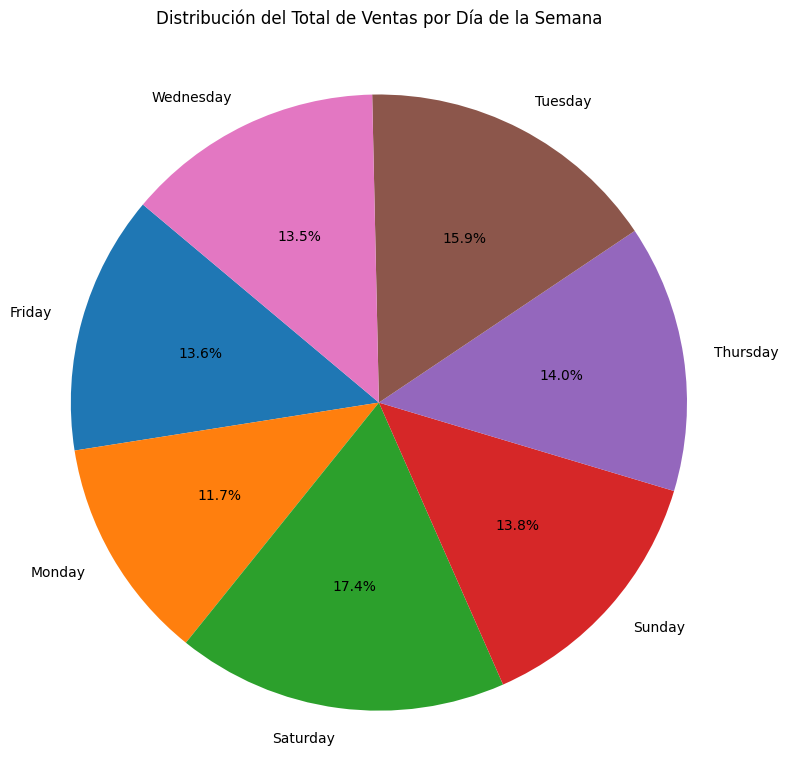

In [122]:
# Convertir la columna de fecha al formato adecuado
df_ventas['Date'] = pd.to_datetime(df_ventas['Date'], format='%d/%m/%Y')

# Calcular el total de ventas por día de la semana
ventas_por_dia_semana = df_ventas.groupby(
    df_ventas['Date'].dt.day_name())['Total'].sum()

# Calcular el porcentaje de ventas que representa cada día
porc_v_dia_semana = ventas_por_dia_semana / ventas_por_dia_semana.sum() * 100

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porc_v_dia_semana, labels=porc_v_dia_semana.index,
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribución del Total de Ventas por Día de la Semana')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Gráfico con la distribución de ventas según la hora del día

Gráfico tipo histograma con la cantidad total de ventas ($) a lo largo del día (cada 2 horas)

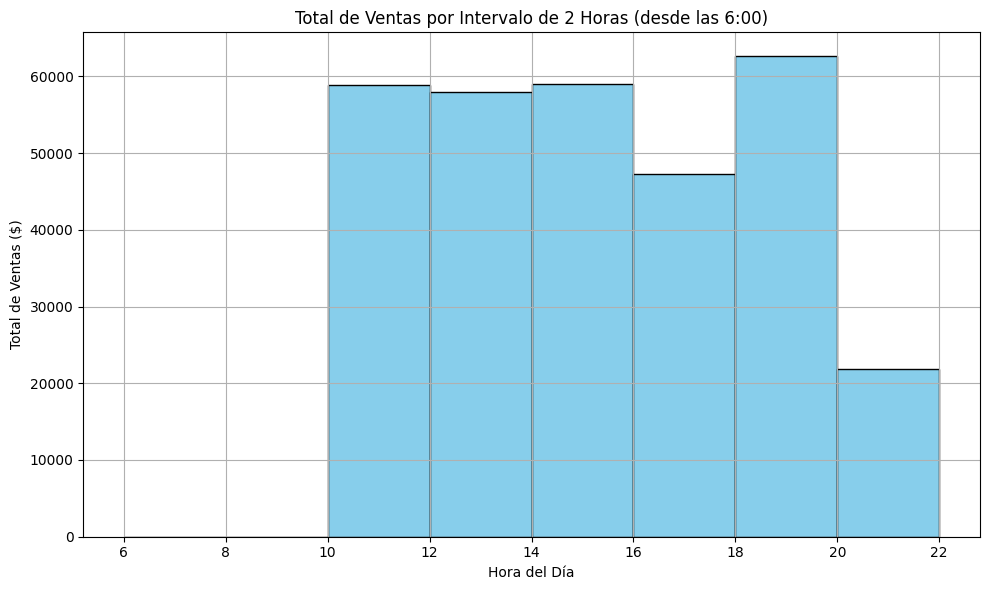

In [123]:
# Convertir la columna 'Time' al formato de fecha y hora
df_ventas['Time'] = pd.to_datetime(df_ventas['Time'], format='%H:%M')

# Filtrar las ventas realizadas entre las 6:00 y las 23:59
df_ventas_filtrado = df_ventas[
    (df_ventas['Time'].dt.hour >= 6) & (df_ventas['Time'].dt.hour < 24)]

# Agrupar las ventas en intervalos de cada 2 horas
# y calcular el total de ventas en cada intervalo
ventas_por_hora = df_ventas_filtrado.groupby(
    df_ventas_filtrado['Time'].dt.hour // 2 * 2)['Total'].sum()

# Crear un gráfico tipo histograma
plt.figure(figsize=(10, 6))
plt.hist(df_ventas_filtrado['Time'].dt.hour,
         bins=np.arange(6, 24, 2),
         weights=df_ventas_filtrado['Total'],
         color='skyblue', edgecolor='black')
plt.title('Total de Ventas por Intervalo de 2 Horas (desde las 6:00)')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Ventas ($)')
plt.xticks(np.arange(6, 24, 2))
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Gráfico apilable con la distribución de ventas totales de cada línea de producto por marca

Gráfico de barras apilable que discrimina la cantidad total de ventas ($) de cada línea de productos describiendo la distribución de ventas por cada marca (A, B, C).

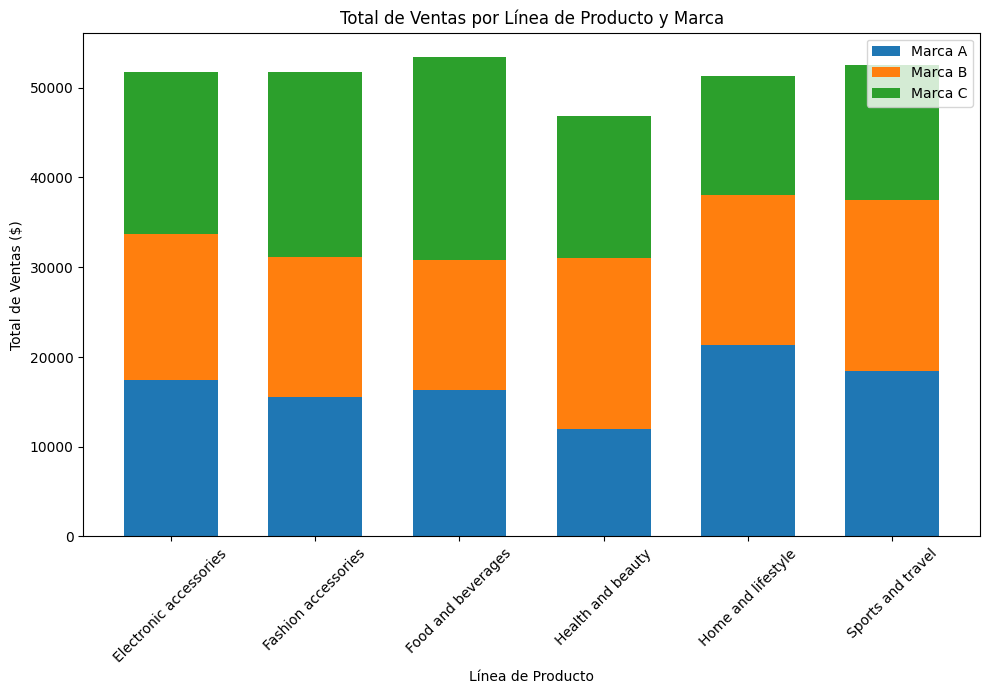

In [124]:
# Filtrar los datos por cada marca
df_marca_A = df_ventas[df_ventas['Branch'] == 'A']
df_marca_B = df_ventas[df_ventas['Branch'] == 'B']
df_marca_C = df_ventas[df_ventas['Branch'] == 'C']

# Calcular los totales de ventas por línea de productos para cada marca
ventas_marca_A = df_marca_A.groupby('Product line')['Total'].sum()
ventas_marca_B = df_marca_B.groupby('Product line')['Total'].sum()
ventas_marca_C = df_marca_C.groupby('Product line')['Total'].sum()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(10, 6))

# Calcular la posición de las barras
bar_width = 0.65
index = np.arange(len(ventas_marca_A.index))

# Gráfico de barras apiladas
plt.bar(index, ventas_marca_A, bar_width, label='Marca A')
plt.bar(index, ventas_marca_B, bar_width, label='Marca B',
        bottom=ventas_marca_A)
plt.bar(index, ventas_marca_C, bar_width, label='Marca C',
        bottom=ventas_marca_A + ventas_marca_B)

# Configurar el título y etiquetas de los ejes
plt.title('Total de Ventas por Línea de Producto y Marca')
plt.xlabel('Línea de Producto')
plt.ylabel('Total de Ventas ($)')
plt.xticks(index, ventas_marca_A.index)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Gráfico de precio unitario versus número de artículos en cada venta

Gráfico de dispersión que relaciona la cantidad de artículos vendidos en cada factura, y su precio unitario.

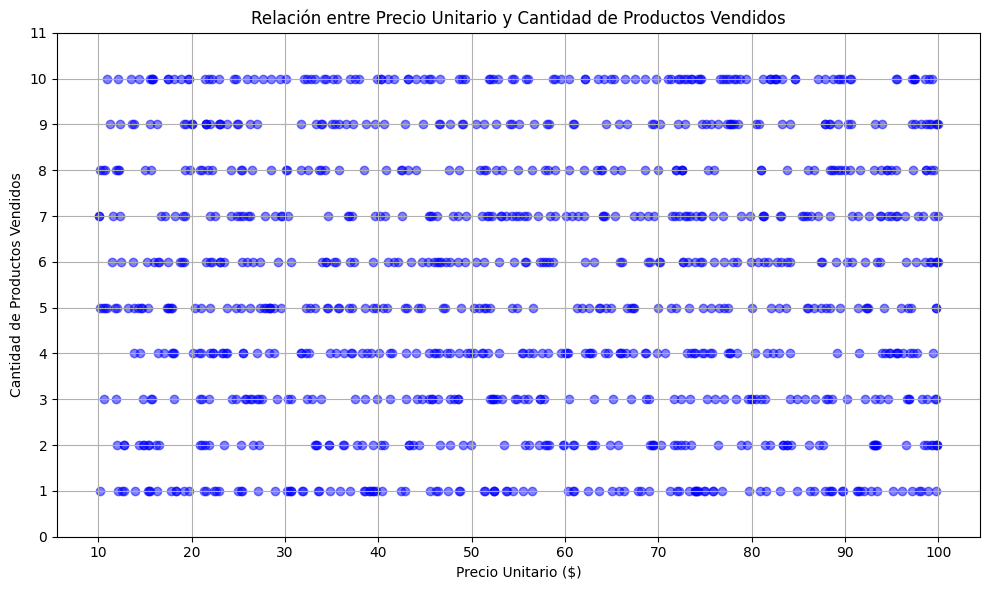

In [125]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_ventas['Unit price'], df_ventas['Quantity'], alpha=0.5, color='blue')

# Configurar el título y etiquetas de los ejes
plt.title('Relación entre Precio Unitario y Cantidad de Productos Vendidos')
plt.xlabel('Precio Unitario ($)')
plt.ylabel('Cantidad de Productos Vendidos')

# Calcular los valores máximos de cada eje
max_value_x = df_ventas['Unit price'].max()
max_value_y = df_ventas['Quantity'].max()

# Establecer los incrementos en los ejes
plt.xticks(np.arange(10, max_value_x + 10, 10))
plt.yticks(np.arange(0, max_value_y + 2))
# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()
